In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
print(f'tf={tf.__version__}')
from tensorflow import keras
print(f'keras={keras.__version__}')
def solve_cudnn_error():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)
solve_cudnn_error()

tf=2.3.0
keras=2.4.0
1 Physical GPUs, 1 Logical GPUs


In [7]:
import os  # 處理字串路徑
import glob  # 查詢檔案
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import itertools
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [9]:
#圖表函數
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [12]:
import shutil
import pandas as pd

In [13]:
data = pd.read_csv('Mango/DATA/train.csv') 
trainData = data['image_id']
train_labels = data['label']
for i in range(len(data)):
    shutil.copy('Mango/DATA/Train_Image/'+trainData[i], 'Mango/train/'+train_labels[i])
# print(trainData)
# print(train_labels)

In [14]:
data = pd.read_csv('Mango/DATA/test.csv') 
testData = data['image_id']
test_labels = data['label']
for i in range(len(data)):
    shutil.copy('Mango/DATA/Test_Image/'+testData[i], 'Mango/test/'+test_labels[i])

In [15]:
train_path = 'Mango/train'
valid_path = 'Mango/test'
test_path = 'Mango/test'

In [16]:
train_datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
)

In [17]:
train_batches = train_datagen.flow_from_directory(train_path, target_size=(128,128), 
                                                         classes=['A',
                                                                  'B',
                                                                  'C'], batch_size=4)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(128,128), 
                                                         classes=['A',
                                                                  'B',
                                                                  'C'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(128,128), 
                                                         classes=['A',
                                                                  'B',
                                                                  'C'], batch_size=4)

Found 6130 images belonging to 3 classes.
Found 250 images belonging to 3 classes.
Found 250 images belonging to 3 classes.


In [18]:
# train_images= np.loadtxt('train.txt',delimiter=',')

In [19]:
# train_images = train_images.reshape(len(trainData),imgWidth,imgHeight,3)

In [20]:
model = Sequential(name='VGG16')
model.add(Convolution2D(64,(3, 3), activation='relu',name='block1_conv1',padding='same',input_shape=(128, 128, 3)))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64,(3, 3), activation='relu',name='block1_conv2',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128,(3, 3), activation='relu',name='block2_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128,(3, 3), activation='relu',name='block2_conv2',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3, 3), activation='relu',name='block3_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3, 3), activation='relu',name='block3_conv2',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3, 3), activation='relu',name='block3_conv3',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block4_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block4_conv2',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block4_conv3',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block5_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block5_conv2',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block5_conv3',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten(name='flatten'))
model.add(Dense(1024, activation='relu',name='fc1'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu',name='fc2'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax',name='predictions'))
model.summary()

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 32, 256)       295168

In [21]:
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(3, activation='softmax'))

In [22]:
model.compile(Adam(lr=.00002122), loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

In [23]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy',f1_m,precision_m, recall_m])

# log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# history = model.fit(x=train_images, 
#                     y=train_labels, 
#                     epochs=20,
#                     batch_size=512,
#                     verbose=1,
#                     validation_data=(test_images, test_labels))
# #                     ,callbacks=[tensorboard_callback])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=20,
                           generator=train_batches, 
                           validation_data= valid_batches, 
                           validation_steps=5,
                           epochs=50,
                           verbose=2)
#                            callbacks=[checkpoint,early],
                           
# model.save('my_model.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
20/20 - 5s - loss: 1.1221 - accuracy: 0.4000 - f1_m: 0.2395 - precision_m: 0.3750 - recall_m: 0.2000 - val_loss: 1.2513 - val_accuracy: 0.1500 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
20/20 - 4s - loss: 1.1173 - accuracy: 0.4125 - f1_m: 0.1251 - precision_m: 0.2042 - recall_m: 0.1000 - val_loss: 1.3233 - val_accuracy: 0.3500 - val_f1_m: 0.3500 - val_precision_m: 0.3500 - val_recall_m: 0.3500
Epoch 3/50
20/20 - 5s - loss: 1.1371 - accuracy: 0.3125 - f1_m: 0.0518 - precision_m: 0.0542 - recall_m: 0.0500 - val_loss: 1.0950 - val_accuracy: 0.3500 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/50
20/20 - 4s - loss: 1.1092 - accuracy: 0.2875 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.1234 - val_accuracy: 0.2500 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m:

Epoch 35/50
20/20 - 3s - loss: 1.0094 - accuracy: 0.5375 - f1_m: 0.0200 - precision_m: 0.0500 - recall_m: 0.0125 - val_loss: 1.0592 - val_accuracy: 0.5000 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 36/50
20/20 - 3s - loss: 1.0031 - accuracy: 0.4625 - f1_m: 0.1276 - precision_m: 0.2667 - recall_m: 0.0875 - val_loss: 0.9793 - val_accuracy: 0.5000 - val_f1_m: 0.2000 - val_precision_m: 0.3000 - val_recall_m: 0.1500
Epoch 37/50
20/20 - 3s - loss: 0.9874 - accuracy: 0.4250 - f1_m: 0.2782 - precision_m: 0.4625 - recall_m: 0.2125 - val_loss: 0.9803 - val_accuracy: 0.6500 - val_f1_m: 0.2933 - val_precision_m: 0.6000 - val_recall_m: 0.2000
Epoch 38/50
20/20 - 3s - loss: 0.9040 - accuracy: 0.6000 - f1_m: 0.2963 - precision_m: 0.4542 - recall_m: 0.2375 - val_loss: 0.8686 - val_accuracy: 0.6000 - val_f1_m: 0.4119 - val_precision_m: 0.5167 - val_recall_m: 0.3500
Epoch 39/50
20/20 - 3s - loss: 0.9030 - accuracy: 0.5875 - f1_m: 0.4551 - precision_m: 0.5542 - 

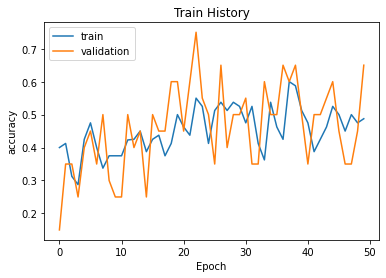

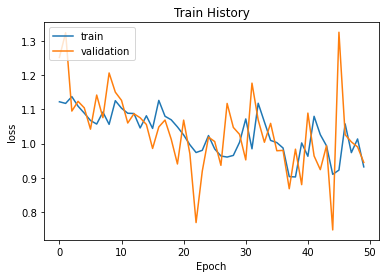

In [24]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
show_train_history(hist,'accuracy','val_accuracy')
show_train_history(hist,'loss','val_loss')

In [25]:
loss, accuracy, f1_score, precision, recall = model.evaluate_generator(generator=valid_batches,verbose=1)

Instructions for updating:
Please use Model.evaluate, which supports generators.
63/63 [==============================] - 7s 114ms/step - loss: 0.9271 - accuracy: 0.5400 - f1_m: 0.3894 - precision_m: 0.5833 - recall_m: 0.3135


In [26]:
print(loss, accuracy, f1_score, precision, recall)

0.9270679950714111 0.5400000214576721 0.38938018679618835 0.5833332538604736 0.3134920597076416


In [ ]:
# !tensorboard --logdir logs
# # !tensorboard --logdir = /logs

In [116]:
from numba import cuda
cuda.select_device(0)
cuda.close()